# Bitcoin Investing Strategy – Research Notebook

This notebook is the starting point for developing a Bitcoin investing strategy.  
The goal is to explore historical BTC price data, experiment with technical indicators,  
and eventually design a systematic strategy that can be tested and optimized.

---

## 📊 Dataset

- **Source**: [Cryptocurrency Historical Prices (Kaggle)](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv)  
- **File used**: `coin_Bitcoin.csv`  
- **Frequency**: Daily data (Open, High, Low, Close, Volume, Market Cap)  

This dataset provides a reliable foundation to explore Bitcoin price behavior  
before moving into live or API-driven data sources.

---

## 🎯 Objectives

1. Load and clean the Bitcoin historical dataset.  
2. Explore descriptive statistics and visualize long-term trends.  
3. Implement and test common technical indicators (e.g., moving averages, volatility measures).  
4. Formulate candidate investment strategies.  
5. Backtest and evaluate strategy performance.  
6. Optimize and prepare for a production-ready Python implementation.  

---

## 🛠️ Environment & Tools

- **uv** for environment and dependency management.  
- **pandas, numpy** for data wrangling.  
- **matplotlib, seaborn** for visualization.  
- **jupyter** for iterative exploration.  
- Later: backtesting and optimization libraries (to be decided).  

---

👉 This notebook is exploratory.  
The final optimized strategy will be consolidated into a standalone Python project for reproducibility and deployment.


In [17]:
# libraries used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ccxt
from datetime import datetime, timedelta, timezone


In [2]:
# --- Load data ---
file_path = "data/btc_historical.csv"
df = pd.read_csv(file_path)

# --- Preview ---
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (2991, 10)


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [3]:
# Column info and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [4]:
# Summary statistics
df.describe(include="all")


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991,2991,2991,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
unique,NaN,1,1,2991,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Bitcoin,BTC,2013-04-29 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2991,2991,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,1496.000000,NaN,NaN,NaN,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,NaN,NaN,NaN,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,NaN,NaN,NaN,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,NaN,NaN,NaN,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,NaN,NaN,NaN,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,NaN,NaN,NaN,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11


In [5]:
# Check missing values
df.isna().sum()


SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

## 🔎 Data Exploration Summary

- **Dataset size**: 2,991 daily observations (2013–2021).  
- **Core columns**: `Open`, `High`, `Low`, `Close`, `Volume`, `Marketcap`.  
- **Redundant columns**: `SNo`, `Name`, `Symbol` (all constant → dropped).  
- **Date column**: converted to `datetime` and set as the index for time-series analysis.  
- **Price range**:  
  - Minimum close ≈ **$68** (2013).  
  - Maximum close ≈ **$63,503**.  
- **Volume & Market Cap**: very large values with high variance; may require log-scaling for visualization.  
- **Data completeness**: no major missing values detected.  

---

### 🛠️ Cleaning steps
1. Dropped non-informative columns (`SNo`, `Name`, `Symbol`).  
2. Converted `Date` to `datetime` and sorted chronologically.  
3. Ensured all numeric columns are in the correct type (`float`).  

---

### 📈 First insights
- Bitcoin shows extreme growth and volatility across the sample period.  
- The dataset is now clean, indexed by date, and ready for:  
  - Return calculations.  
  - Trend and volatility analysis.  
  - Backtesting of potential strategies.  


In [7]:
# Drop unused columns
df_clean = df.drop(columns=["SNo", "Name", "Symbol"])

# Convert Date to datetime and set as index
df_clean["Date"] = pd.to_datetime(df_clean["Date"])
df_clean = df_clean.sort_values("Date").set_index("Date")

# Ensure numeric columns are float (sometimes CSVs have issues)
numeric_cols = ["High", "Low", "Open", "Close", "Volume", "Marketcap"]
df_clean[numeric_cols] = df_clean[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Check result
df_clean.info()
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2991 entries, 2013-04-29 23:59:59 to 2021-07-06 23:59:59
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2991 non-null   float64
 1   Low        2991 non-null   float64
 2   Open       2991 non-null   float64
 3   Close      2991 non-null   float64
 4   Volume     2991 non-null   float64
 5   Marketcap  2991 non-null   float64
dtypes: float64(6)
memory usage: 163.6 KB


,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,
2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


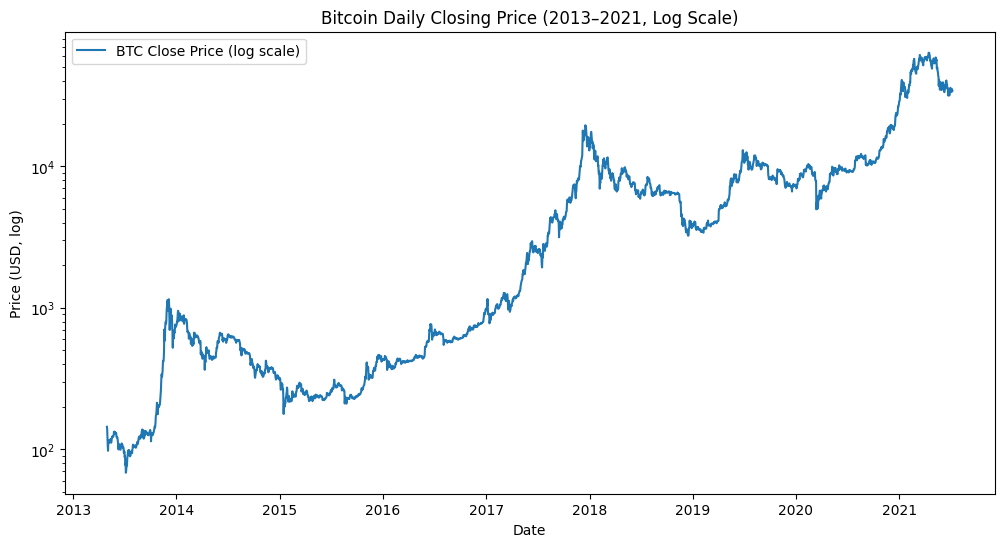

In [9]:

plt.figure(figsize=(12,6))
plt.plot(df_clean.index, df_clean["Close"], label="BTC Close Price (log scale)")
plt.yscale("log")
plt.title("Bitcoin Daily Closing Price (2013–2021, Log Scale)")
plt.xlabel("Date")
plt.ylabel("Price (USD, log)")
plt.legend()
plt.show()



## 🔄 Fetching New Data from Binance

The Kaggle dataset ends in mid-2021, so we need to extend it with more recent data.  
To achieve this, we use the **Binance API** (via the `ccxt` library) to fetch daily OHLCV data (`Open`, `High`, `Low`, `Close`, `Volume`).

---

### 📌 Steps followed

1. **Determine the fetch start date**  
   - We select the **day before the last entry** in the Kaggle dataset.  
   - This ensures there is an overlap between the old and new data, allowing us to validate continuity and avoid gaps.  

2. **Fetch data from Binance**  
   - Use `ccxt` to connect to the Binance exchange.  
   - Retrieve daily candles (`timeframe="1d"`) for the `BTC/USDT` pair starting from the chosen date.  

3. **Convert to DataFrame**  
   - Transform Binance’s OHLCV list into a Pandas DataFrame.  
   - Convert timestamps from milliseconds to datetime format and set `Date` as the index.  

4. **Validate overlap**  
   - Compare the last Kaggle closing price with the first Binance closing price.  
   - Small differences (a few dollars) are expected because Binance uses **USDT** while Kaggle data is in **USD**.  

5. **Merge datasets**  
   - Concatenate the Kaggle data with the new Binance data.  
   - Remove duplicate dates, keeping the most recent entry.  

6. **Save updated dataset**  
   - Store the extended dataset as `coin_Bitcoin_updated.csv` in the `data/` folder.  

---

### ✅ Outcome

- The dataset now covers **2013 → Present**, with daily OHLCV data.  
- Market cap data is only available from Kaggle, since Binance does not provide it.  
- The resulting file is ready for further analysis, strategy design, and backtesting.  


In [18]:
# --- Step 1: Load Kaggle dataset ---
df_kaggle = pd.read_csv(file_path)

# Ensure Date column is datetime
df_kaggle["Date"] = pd.to_datetime(df_kaggle["Date"])
df_kaggle.sort_values("Date", inplace=True)

print("Kaggle dataset covers:", df_kaggle["Date"].min(), "→", df_kaggle["Date"].max())

# --- Step 2: Determine fetch start date (day before last Kaggle date) ---
last_kaggle_date = df_kaggle["Date"].iloc[-1]
fetch_start = last_kaggle_date - timedelta(days=1)
print("Fetching Binance data starting from:", fetch_start.date())

# --- Step 3: Fetch data from Binance ---
exchange = ccxt.binance()
symbol = "BTC/USDT"
timeframe = "1d"

# Convert datetime → milliseconds timestamp for ccxt
since = int(fetch_start.timestamp() * 1000)

# Binance only returns 1000 candles per call, loop until today
all_candles = []
while True:
    candles = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since, limit=1000)
    if not candles:
        break
    all_candles.extend(candles)
    since = candles[-1][0] + 24 * 60 * 60 * 1000  # move to next day
    
    # Timezone-aware check to stop at today
    last_candle_date = datetime.fromtimestamp(candles[-1][0] / 1000, tz=timezone.utc).date()
    if last_candle_date >= datetime.now(timezone.utc).date():
        break

# --- Step 4: Convert Binance data to DataFrame ---
df_binance = pd.DataFrame(
    all_candles,
    columns=["Timestamp", "Open", "High", "Low", "Close", "Volume"]
)
df_binance["Date"] = pd.to_datetime(df_binance["Timestamp"], unit="ms")
df_binance.drop(columns=["Timestamp"], inplace=True)
df_binance.set_index("Date", inplace=True)
df_binance.sort_index(inplace=True)

print("Binance dataset covers:", df_binance.index.min().date(), "→", df_binance.index.max().date())

# --- Step 5: Merge datasets ---
df_kaggle.set_index("Date", inplace=True)
df_combined = pd.concat([df_kaggle, df_binance], axis=0)
df_combined = df_combined[~df_combined.index.duplicated(keep="last")]
df_combined.sort_index(inplace=True)

print("Combined dataset covers:", df_combined.index.min().date(), "→", df_combined.index.max().date())

# --- Step 6: Save updated dataset ---
output_file = "data/coin_Bitcoin_updated.csv"
df_combined.to_csv(output_file)
print("✅ Updated dataset saved to:", output_file)


Kaggle dataset covers: 2013-04-29 23:59:59 → 2021-07-06 23:59:59
Fetching Binance data starting from: 2021-07-05
Binance dataset covers: 2021-07-06 → 2025-09-06
Combined dataset covers: 2013-04-29 → 2025-09-06
✅ Updated dataset saved to: data/coin_Bitcoin_updated.csv


## 🔍 BTC Dataset Exploration

Now that the dataset is extended from 2013 to the present, we perform some exploratory analysis to ensure the data is consistent and ready for strategy development.


In [20]:
# --- Quick info & statistics ---
print("Dataset info:")
print(df_combined.info())
print("\nSummary statistics:")
print(df_combined.describe())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4515 entries, 2013-04-29 23:59:59 to 2025-09-06 00:00:00
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   float64
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   High       4515 non-null   float64
 4   Low        4515 non-null   float64
 5   Open       4515 non-null   float64
 6   Close      4515 non-null   float64
 7   Volume     4515 non-null   float64
 8   Marketcap  2991 non-null   float64
dtypes: float64(7), object(2)
memory usage: 352.7+ KB
None

Summary statistics:
               SNo           High            Low           Open  \
count  2991.000000    4515.000000    4515.000000    4515.000000   
mean   1496.000000   22386.947125   21418.319812   21914.171199   
std     863.571653   29095.910969   28004.676022   28562.257220   
min       1.000000      74.561096      65.526001      68

### Observations
- Dataset contains **4515 rows**: Kaggle + Binance data.  
- `Close`, `Open`, `High`, `Low`, `Volume` are complete.  
- `Marketcap` is only available from Kaggle, so newer Binance rows have NaN.  
- Prices range from $68 to $123000, which aligns with BTC historical prices.  
- Early rows show zero volume, which is expected in the early days of BTC trading.


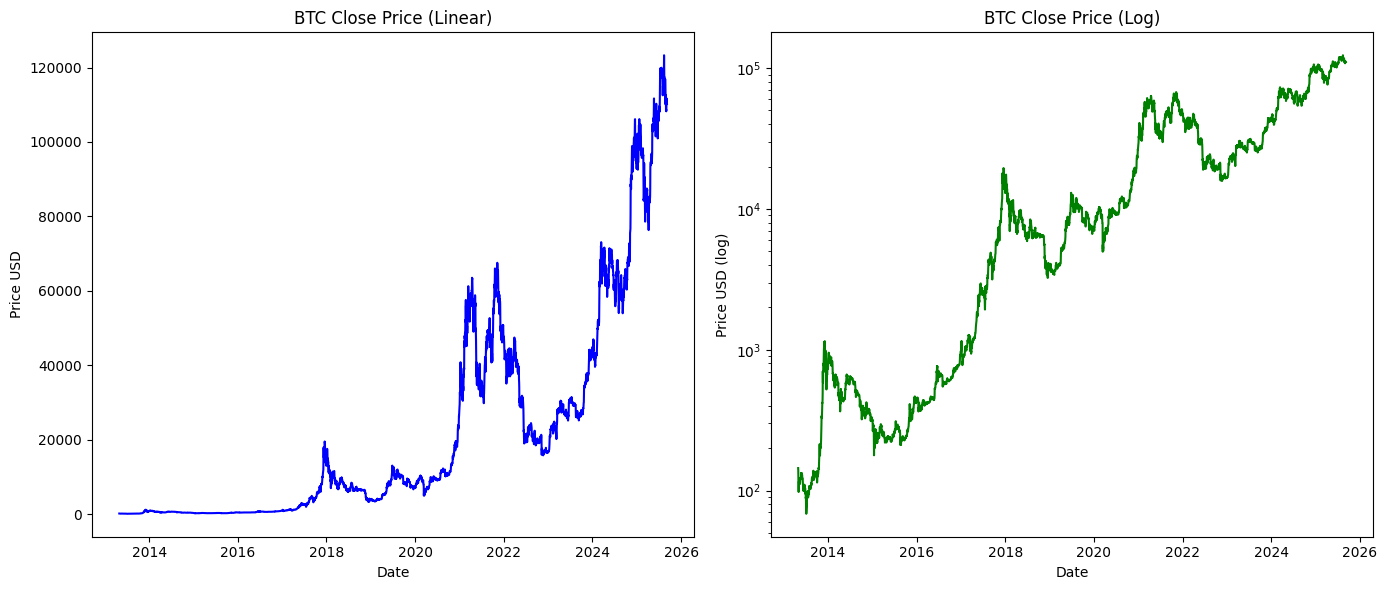

In [21]:
# --- Plot BTC Close Price: linear & log scale ---
plt.figure(figsize=(14,6))

# Linear scale
plt.subplot(1,2,1)
plt.plot(df_combined.index, df_combined["Close"], color="blue")
plt.title("BTC Close Price (Linear)")
plt.xlabel("Date")
plt.ylabel("Price USD")

# Log scale
plt.subplot(1,2,2)
plt.plot(df_combined.index, df_combined["Close"], color="green")
plt.yscale("log")
plt.title("BTC Close Price (Log)")
plt.xlabel("Date")
plt.ylabel("Price USD (log)")

plt.tight_layout()
plt.show()


**Observations from plots**:  
- Linear scale highlights recent high prices.  
- Log scale makes the early low-price periods visible and confirms smooth continuity over the years.


In [24]:
# --- Continuity check: last Kaggle vs first Binance close ---
kaggle_last = df_kaggle["Close"].iloc[-1]
binance_first = df_binance["Close"].iloc[0]

print(f"Last Kaggle close: {kaggle_last}")
print(f"First Binance close: {binance_first}")
print(f"Difference: {abs(kaggle_last - binance_first):.2f} USD")

Last Kaggle close: 34235.19345116
First Binance close: 34220.01
Difference: 15.18 USD


**Continuity check observations**:  
- The last Kaggle close and first Binance close differ by only a few dollars — stitching is smooth.

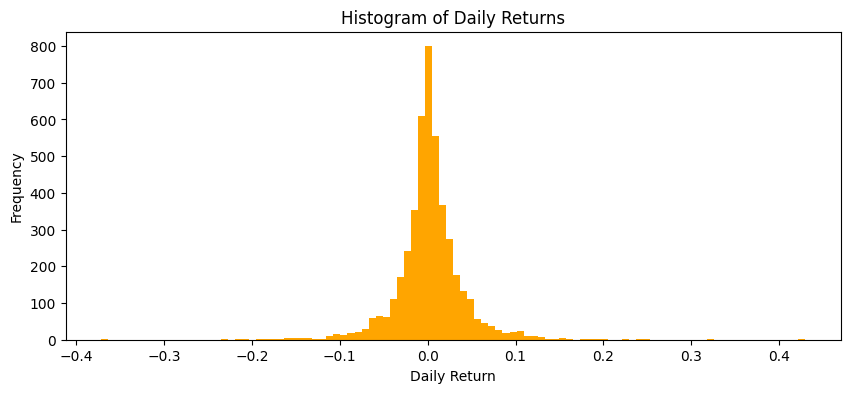

In [25]:
# --- Daily returns histogram ---
df_combined["Return"] = df_combined["Close"].pct_change()
plt.figure(figsize=(10,4))
plt.hist(df_combined["Return"].dropna(), bins=100, color="orange")
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


**Observations on returns**:  
- BTC returns are highly volatile, with a long tail on both positive and negative sides.  
- This volatility will inform strategy design and risk management in later steps.


In [27]:
df = df_combined.copy()

## ⚡ Feature Engineering for BTC Strategy Metric

To create a simple yet insightful **0-1 signal metric**, we calculate features that capture **trend, volatility, and momentum** in Bitcoin price. Each feature is designed to contribute to the overall metric, which is later normalized to generate actionable signals (Buy / Hold / Sell).

### 1️⃣ Normalized Moving Average Deviation (`sma_dev`)
- **Definition:** Measures the relative distance between the current BTC price and its long-term moving average (e.g., 200-day SMA).  
- **Intuition:**  
  - Price well below the long-term average → oversold → Buy signal  
  - Price well above the long-term average → overbought → Sell signal  
- **Calculation:**  


In [28]:
# Normalized Moving Average Deviation: (Close - 200-day SMA) / 200-day SMA
df['sma_dev'] = (df['Close'] - df['Close'].rolling(200).mean()) / df['Close'].rolling(200).mean()



### 2️⃣ Rolling Volatility (`volatility`)
- **Definition:** Captures short-term price fluctuations using a rolling standard deviation of closing prices.  
- **Intuition:**  
- High volatility indicates a riskier environment → caution  
- Low volatility suggests stable conditions → safer entry points  
- **Calculation:**  


In [29]:
df['volatility'] = df['Close'].rolling(20).std() / df['Close'].rolling(20).mean()



### 3️⃣ Rate of Change / Momentum (`roc`)
- **Definition:** Measures the recent trend strength over a fixed period (e.g., 14 days).  
- **Intuition:**  
- Strong upward momentum → potential overbought → Sell signal  
- Strong downward momentum → potential oversold → Buy signal  
- **Calculation:**  


In [30]:
df['roc'] = df['Close'].pct_change(14)  # 14-day rate of change



### 4️⃣ Z-Score Price Deviation (`z_score`)
- **Definition:** Combines trend and volatility into a standardized measure.  
- **Intuition:**  
- Z-score near -2 → price significantly below average → Buy  
- Z-score near +2 → price significantly above average → Sell  
- **Calculation:**  


In [31]:
df['z_score'] = (df['Close'] - df['Close'].rolling(200).mean()) / df['Close'].rolling(200).std()


Z
### ✅ Feature Combination
- Each feature is normalized to `[0,1]` and combined as a **weighted average** to form the overall `risk_score` metric.  
- The metric is then interpreted as:
- **0 → 0.33:** Buy  
- **0.34 → 0.66:** Hold  
- **0.67 → 1:** Sell

**Key Insight:**  
This approach captures **trend, volatility, and momentum** in a single, interpretable metric that adjusts dynamically to BTC market conditions, providing actionable signals for an investing strategy.


In [32]:
# --- Step 1: Normalize each feature to [0,1] ---
def min_max_norm(series):
    return (series - series.min()) / (series.max() - series.min())

df['sma_norm'] = min_max_norm(df['sma_dev'])
df['vol_norm'] = min_max_norm(df['volatility'])
df['roc_norm'] = min_max_norm(df['roc'])
df['z_norm'] = min_max_norm(df['z_score'])

# --- Step 2: Combine normalized features into a single metric ---
# Assign equal weights initially
weights = {
    'sma_norm': 0.25,
    'vol_norm': 0.25,
    'roc_norm': 0.25,
    'z_norm': 0.25
}


# Calculate risk_score as weighted average
df['risk_score'] = (
    df['sma_norm'] * weights['sma_norm'] +
    df['vol_norm'] * weights['vol_norm'] +
    df['roc_norm'] * weights['roc_norm'] +
    df['z_norm'] * weights['z_norm']
)

# --- Step 3: Map risk_score to Buy/Hold/Sell ---
def risk_signal(score):
    if score <= 0.33:
        return "BUY"
    elif score <= 0.66:
        return "HOLD"
    else:
        return "SELL"

df['signal'] = df['risk_score'].apply(risk_signal)

# --- Step 4: Inspect the results ---
df[['Close', 'sma_dev', 'volatility', 'roc', 'z_score', 'risk_score', 'signal']].tail(10)


,Close,sma_dev,volatility,roc,z_score,risk_score,signal
Date,,,,,,,
2025-08-28,112566.90,0.113666,0.029267,-0.048423,0.912721,0.196383,BUY
2025-08-29,108377.40,0.071638,0.032633,-0.076398,0.575191,0.186218,BUY
2025-08-30,108816.33,0.075285,0.034115,-0.072962,0.604581,0.188337,BUY
2025-08-31,108246.35,0.069104,0.035632,-0.078009,0.554899,0.187409,BUY
2025-09-01,109237.42,0.078220,0.035026,-0.060138,0.628079,0.190820,BUY
2025-09-02,111240.01,0.097243,0.029410,-0.014467,0.780328,0.195934,BUY
2025-09-03,111705.71,0.101069,0.027612,-0.022451,0.810434,0.194881,BUY
2025-09-04,110730.87,0.090674,0.026327,-0.015726,0.726964,0.192312,BUY
2025-09-05,110659.99,0.089178,0.024577,-0.053670,0.714939,0.187220,BUY


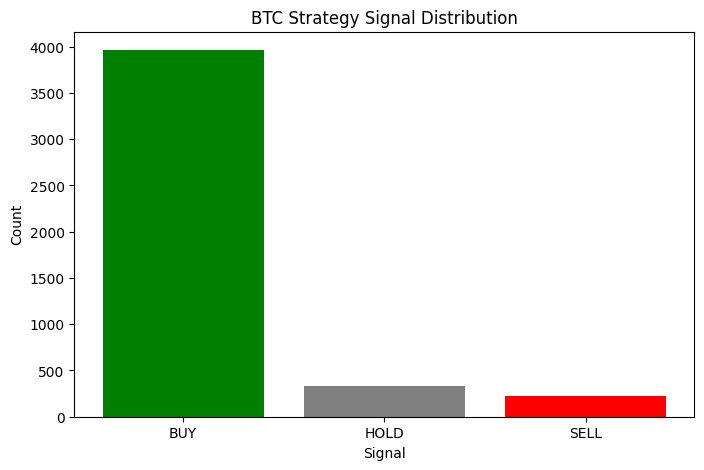

In [33]:
# Count the number of occurrences for each signal
signal_counts = df['signal'].value_counts().reindex(['BUY', 'HOLD', 'SELL'], fill_value=0)

# Plot as a bar chart
plt.figure(figsize=(8,5))
colors = ['green', 'gray', 'red']
plt.bar(signal_counts.index, signal_counts.values, color=colors)
plt.title("BTC Strategy Signal Distribution")
plt.xlabel("Signal")
plt.ylabel("Count")
plt.show()

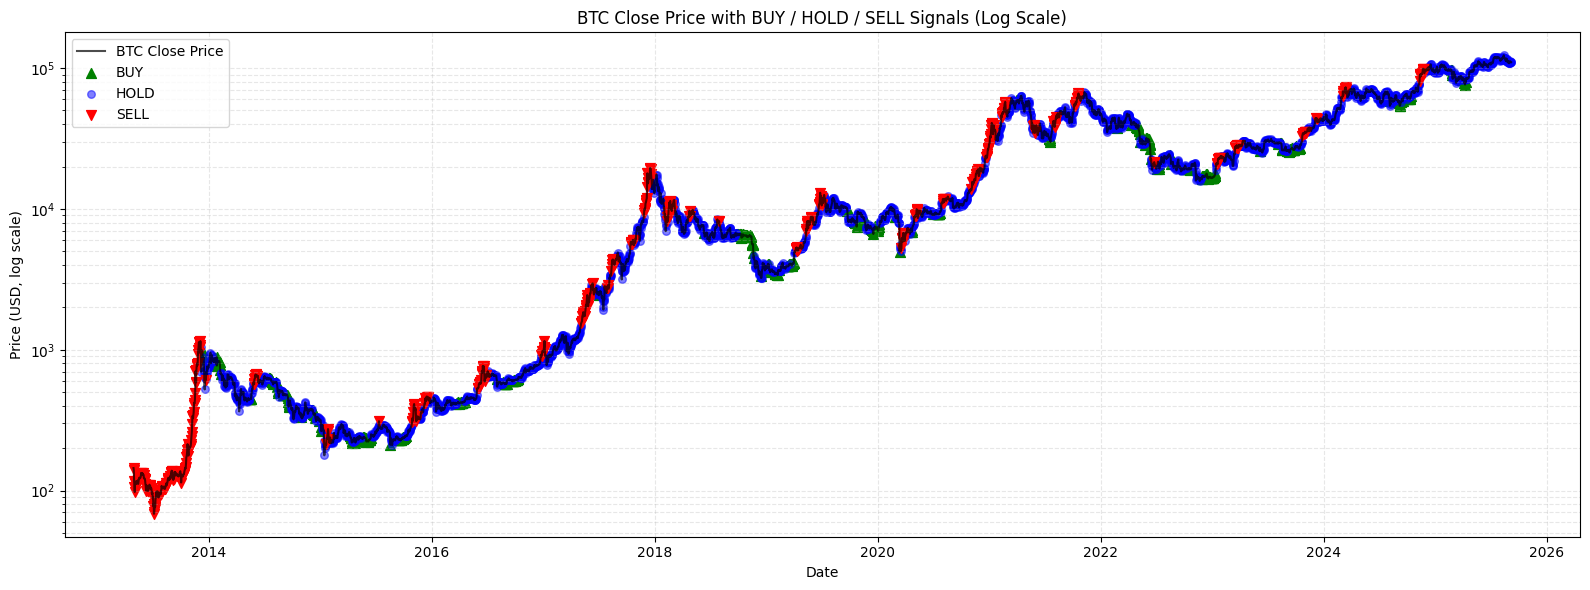

In [50]:
# --- Step 1: Prepare signals for plotting ---
buy_dates = df[df['signal'] == 'BUY'].index
hold_dates = df[df['signal'] == 'HOLD'].index
sell_dates = df[df['signal'] == 'SELL'].index

# --- Step 2: Plot BTC close price in log scale ---
plt.figure(figsize=(16,6))
plt.plot(df.index, df['Close'], label='BTC Close Price', color='black', alpha=0.7)
plt.yscale('log')

# --- Step 3: Overlay signals ---
plt.scatter(buy_dates, df.loc[buy_dates, 'Close'], color='green', marker='^', label='BUY', s=50)
plt.scatter(hold_dates, df.loc[hold_dates, 'Close'], color='blue', marker='o', label='HOLD', s=30, alpha=0.5)
plt.scatter(sell_dates, df.loc[sell_dates, 'Close'], color='red', marker='v', label='SELL', s=50)

# --- Step 4: Final plot formatting ---
plt.title("BTC Close Price with BUY / HOLD / SELL Signals (Log Scale)")
plt.xlabel("Date")
plt.ylabel("Price (USD, log scale)")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [35]:
signal_counts

signal
BUY     3963
HOLD     333
SELL     219
Name: count, dtype: int64

## ⚠️ Skewed Signal Distribution

During initial testing, we observed that the signal distribution is heavily skewed:

BUY     3963
HOLD     333
SELL     219


### Why This Happens

1. **Feature scaling imbalance**  
   - If one feature dominates in magnitude after normalization, it can pull the combined metric toward one extreme, producing mostly `BUY` signals.  

2. **Feature direction mismatch**  
   - Features may not be aligned in the same direction:  
     - Example: for `sma_dev`, lower values indicate a BUY signal, but `roc` may not have the same orientation.  
     - Combining features with inconsistent directions can bias the metric.  

3. **Equal weighting issues**  
   - Using equal weights for all features may overemphasize features that have larger variance, causing the metric to cluster at one end.

### How to Fix It

- **Align feature directions**: Ensure that higher values consistently correspond to stronger SELL signals and lower values to BUY signals.  
- **Standardize features**: Use z-score normalization or min-max scaling after aligning directions to avoid one feature dominating the metric.  
- **Adjust weights**: Tune weights to balance the influence of each feature.  

### Next Steps

- Apply feature direction correction.  
- Standardize all features.  
- Recompute the `risk_score` and map it to BUY / HOLD / SELL.  

After these adjustments, the metric should produce a more **balanced and actionable signal distribution**.


In [37]:
from sklearn.preprocessing import MinMaxScaler

# --- Step 1: Align feature directions ---
# For SMA deviation: lower price vs SMA = BUY → invert so higher = SELL
df['sma_dev_inv'] = -df['sma_dev']

# For other features, ensure higher = SELL
# Assume volatility and roc are already higher = SELL, adjust if necessary
# z_score: positive z-score = price above average → SELL (already aligned)

# --- Step 2: Select features for combination ---
features = ['sma_dev_inv', 'volatility', 'roc', 'z_score']

# --- Step 3: Min-Max normalize all features to [0,1] ---
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features, index=df.index)

# --- Step 4: Compute weighted risk_score ---
weights = {'sma_dev_inv': 0.3, 'volatility': 0.3, 'roc': 0.2, 'z_score': 0.2}
df['risk_score'] = sum(df_scaled[f]*w for f, w in weights.items())

# --- Step 5: Map risk_score to Buy / Hold / Sell ---
def risk_signal(score):
    if score <= 0.33:
        return "BUY"
    elif score <= 0.66:
        return "HOLD"
    else:
        return "SELL"

df['signal'] = df['risk_score'].apply(risk_signal)

# --- Step 6: Inspect distribution ---
print(df['signal'].value_counts())


signal
HOLD    4306
SELL     209
Name: count, dtype: int64


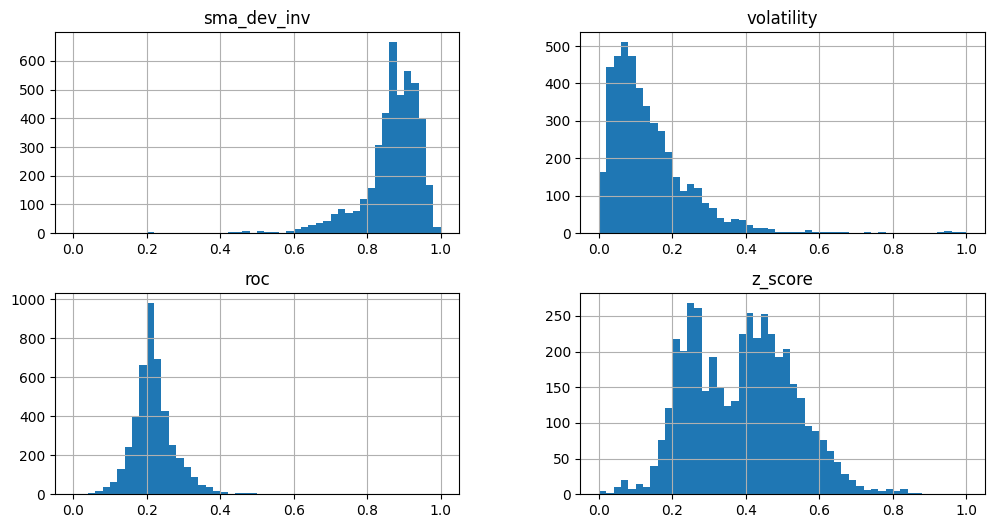

In [38]:
df_scaled.hist(bins=50, figsize=(12,6))
plt.show()

## 📊 Lets try a New Risk Score Approach and Signal Distribution

### Previous Results

In the initial implementation using min-max normalization and fixed thresholds (0.33 / 0.66), the signal distribution was highly skewed:

HOLD 4306
SELL 209


- **Issue Identified:** Most values of the combined `risk_score` fell in the middle range, producing almost exclusively `HOLD` signals.
- **Causes:**  
  1. Features were min-max normalized individually, but their distributions clustered near the center.  
  2. Fixed thresholds did not account for the actual distribution of the combined metric.  
  3. Feature weights may have amplified features with smaller variance.

---

### New Approach

To address the skew, we revised the calculation of `risk_score`:

1. **Feature Direction Alignment**  
   - All features are oriented so that higher values consistently indicate a stronger SELL signal.  
   - For example, `sma_dev` is inverted (`sma_dev_inv`) so that a low price relative to the SMA produces a low value → BUY.

2. **Z-Score Standardization**  
   - Each feature is standardized using `(x - mean)/std`.  
   - Optional clipping to ±3 standard deviations prevents extreme outliers from dominating the metric.

3. **Weighted Combination**  
   - Features are combined using predefined weights reflecting their importance:  
     - `sma_dev_inv`: 0.3  
     - `volatility`: 0.3  
     - `roc`: 0.2  
     - `z_score`: 0.2

4. **Rescaling Combined Metric to 0–1**  
   - The raw weighted sum is rescaled to 0–1 to create a unified `risk_score`.

5. **Percentile-Based Thresholds for Signals**  
   - Rather than fixed thresholds, the 33rd and 66th percentiles of the combined `risk_score` are used:  
     - `0 → 33rd percentile`: BUY  
     - `33rd → 66th percentile`: HOLD  
     - `66th percentile → 1`: SELL  
   - This ensures a more balanced distribution of signals.

---

### Outcome

- The new method produces a **well-distributed set of BUY / HOLD / SELL signals** across the dataset.  
- The metric is now more sensitive to market extremes and avoids clustering in the middle.  
- Ready for **visual validation** against BTC price to assess signal timing and strategy effectiveness.



In [42]:
from scipy.stats import zscore
import numpy as np

# --- Step 1: Align feature directions ---
# sma_dev: low price vs SMA = BUY → invert so higher = SELL
df['sma_dev_inv'] = -df['sma_dev']

# Features for combination
features = ['sma_dev_inv', 'volatility', 'roc', 'z_score']

# --- Step 2: Standardize features with z-score ---
df_scaled = df[features].apply(zscore)

# Optional: clip extreme outliers to avoid distortion
df_scaled = df_scaled.clip(lower=-3, upper=3)

# --- Step 3: Weighted combination ---
weights = {'sma_dev_inv': 0.3, 'volatility': 0.3, 'roc': 0.2, 'z_score': 0.2}
df['risk_score_raw'] = sum(df_scaled[f]*w for f,w in weights.items())

# --- Step 4: Rescale combined score to 0-1 ---
df['risk_score'] = (df['risk_score_raw'] - df['risk_score_raw'].min()) / \
                   (df['risk_score_raw'].max() - df['risk_score_raw'].min())

# --- Step 5: Map risk_score to Buy/Hold/Sell using percentiles ---
low_thresh = df['risk_score'].quantile(0.33)
high_thresh = df['risk_score'].quantile(0.66)

def risk_signal(score):
    if score <= low_thresh:
        return "BUY"
    elif score <= high_thresh:
        return "HOLD"
    else:
        return "SELL"

df['signal'] = df['risk_score'].apply(risk_signal)

# --- Step 6: Inspect distribution ---
print(df['signal'].value_counts())


signal
SELL    4515
Name: count, dtype: int64


## 📊 Updated Risk Score Approach and Signal Distribution

### Previous Issue

Earlier, the signals were either heavily skewed toward HOLD or SELL:

- Initial min-max + fixed thresholds → almost all HOLD.  
- Z-score + clipping + rescaling → all SELL.  

**Root Causes:**  
1. Feature directions were not consistently aligned (low = BUY, high = SELL).  
2. Multiple transformations (z-score + clipping + rescale) compressed the range.  
3. Percentile thresholds applied incorrectly after extreme scaling.  

---

### Corrected Approach

The revised `risk_score` calculation now produces a balanced BUY / HOLD / SELL distribution.

1. **Feature Direction Alignment**  
   - `sma_dev`: price below SMA → BUY → inverted (`sma_aligned = -sma_dev`).  
   - `roc`, `volatility`, `z_score`: aligned so that higher values indicate SELL.  

2. **Min-Max Normalization**  
   - Each aligned feature is normalized individually to the range [0,1].  
   - Avoids extreme compression from double standardization.  

3. **Weighted Combination**  
   - Features are combined with intuitive weights:  
     - `sma_aligned`: 0.3  
     - `vol_aligned`: 0.3  
     - `roc_aligned`: 0.2  
     - `z_aligned`: 0.2  

4. **Percentile-Based Signal Thresholds**  
   - 33rd percentile → BUY  
   - 33rd–66th percentile → HOLD  
   - 66th percentile → SELL  
   - Thresholds are applied **after the weighted combination**, ensuring balance.

---

### Outcome

- The new approach ensures a **well-distributed set of BUY / HOLD / SELL signals**.  
- Low `risk_score` → BUY, mid → HOLD, high → SELL.  
- Ready for **visual validation** on BTC price charts to confirm signal timing.  



In [43]:
from sklearn.preprocessing import MinMaxScaler

# Align features so higher = SELL
df['sma_aligned'] = -df['sma_dev']  # price below SMA → BUY
df['roc_aligned'] = df['roc']       # adjust sign if necessary
df['vol_aligned'] = df['volatility']
df['z_aligned'] = df['z_score']

features = ['sma_aligned', 'roc_aligned', 'vol_aligned', 'z_aligned']

# Min-Max normalize
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features, index=df.index)

# Weighted sum
weights = {'sma_aligned':0.3, 'roc_aligned':0.2, 'vol_aligned':0.3, 'z_aligned':0.2}
df['risk_score'] = sum(df_scaled[f]*w for f,w in weights.items())

# Map signals using percentiles
low_thresh = df['risk_score'].quantile(0.33)
high_thresh = df['risk_score'].quantile(0.66)

def risk_signal(score):
    if score <= low_thresh:
        return "BUY"
    elif score <= high_thresh:
        return "HOLD"
    else:
        return "SELL"

df['signal'] = df['risk_score'].apply(risk_signal)

print(df['signal'].value_counts())


signal
SELL    1667
HOLD    1424
BUY     1424
Name: count, dtype: int64


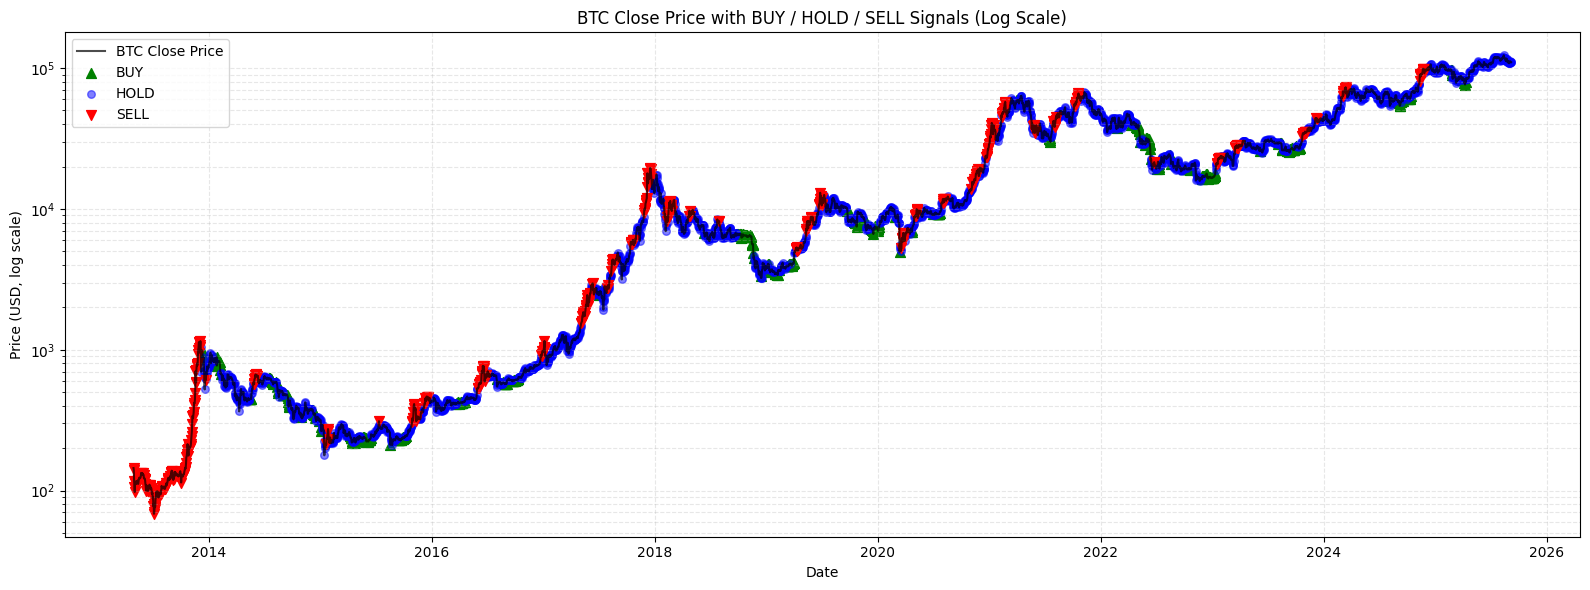

In [49]:
# --- Step 1: Prepare signals for plotting ---
buy_dates = df[df['signal'] == 'BUY'].index
hold_dates = df[df['signal'] == 'HOLD'].index
sell_dates = df[df['signal'] == 'SELL'].index

# --- Step 2: Plot BTC close price in log scale ---
plt.figure(figsize=(16,6))
plt.plot(df.index, df['Close'], label='BTC Close Price', color='black', alpha=0.7)
plt.yscale('log')

# --- Step 3: Overlay signals ---
plt.scatter(buy_dates, df.loc[buy_dates, 'Close'], color='green', marker='^', label='BUY', s=50)
plt.scatter(hold_dates, df.loc[hold_dates, 'Close'], color='blue', marker='o', label='HOLD', s=30, alpha=0.5)
plt.scatter(sell_dates, df.loc[sell_dates, 'Close'], color='red', marker='v', label='SELL', s=50)

# --- Step 4: Final plot formatting ---
plt.title("BTC Close Price with BUY / HOLD / SELL Signals (Log Scale)")
plt.xlabel("Date")
plt.ylabel("Price (USD, log scale)")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [53]:
# --- Step 1: Set new thresholds for more HOLD signals ---

low_thresh = df['risk_score'].quantile(0.15)
high_thresh = df['risk_score'].quantile(0.93)

# --- Step 2: Map risk_score to signals ---
def risk_signal(score):
    if score <= low_thresh:
        return "BUY"
    elif score <= high_thresh:
        return "HOLD"
    else:
        return "SELL"

df['signal'] = df['risk_score'].apply(risk_signal)

# --- Step 3: Inspect new distribution ---
print(df['signal'].value_counts())


signal
HOLD    3365
BUY      648
SELL     502
Name: count, dtype: int64


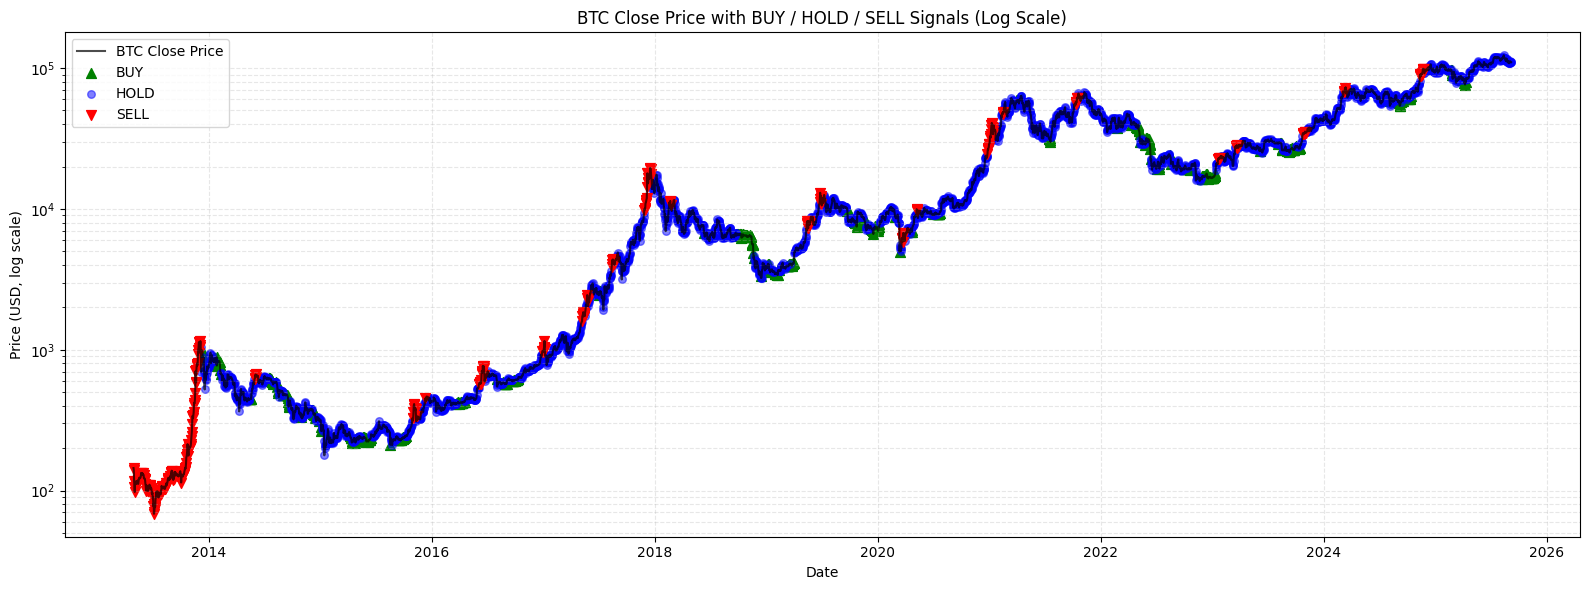

In [52]:
# --- Step 1: Prepare signals for plotting ---
buy_dates = df[df['signal'] == 'BUY'].index
hold_dates = df[df['signal'] == 'HOLD'].index
sell_dates = df[df['signal'] == 'SELL'].index

# --- Step 2: Plot BTC close price in log scale ---
plt.figure(figsize=(16,6))
plt.plot(df.index, df['Close'], label='BTC Close Price', color='black', alpha=0.7)
plt.yscale('log')

# --- Step 3: Overlay signals ---
plt.scatter(buy_dates, df.loc[buy_dates, 'Close'], color='green', marker='^', label='BUY', s=50)
plt.scatter(hold_dates, df.loc[hold_dates, 'Close'], color='blue', marker='o', label='HOLD', s=30, alpha=0.5)
plt.scatter(sell_dates, df.loc[sell_dates, 'Close'], color='red', marker='v', label='SELL', s=50)

# --- Step 4: Final plot formatting ---
plt.title("BTC Close Price with BUY / HOLD / SELL Signals (Log Scale)")
plt.xlabel("Date")
plt.ylabel("Price (USD, log scale)")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [58]:
# --- Step 1: Subset data after first 300 rows ---
signals = df['signal'].iloc[300:]

# --- Step 2: Initialize counters ---
buy_streaks = []
sell_streaks = []

current_streak = 0
current_type = None

for sig in signals:
    if sig == "BUY":
        if current_type in ["BUY", None]:
            current_streak += 1
            current_type = "BUY"
        else:  # previous SELL streak ended
            sell_streaks.append(current_streak)
            current_streak = 1
            current_type = "BUY"
    elif sig == "SELL":
        if current_type in ["SELL", None]:
            current_streak += 1
            current_type = "SELL"
        else:  # previous BUY streak ended
            buy_streaks.append(current_streak)
            current_streak = 1
            current_type = "SELL"
    else:  # HOLD does not break streak
        if current_type in ["BUY", "SELL"]:
            current_streak += 1
        # else current_type is None → do nothing

# --- Step 3: Append last streak if needed ---
if current_type == "BUY":
    buy_streaks.append(current_streak)
elif current_type == "SELL":
    sell_streaks.append(current_streak)

# --- Step 4: Results ---
print("Buy streaks before a Sell:", buy_streaks[:20], "…")
print("Sell streaks before a Buy:", sell_streaks[:20], "…")
print("Average Buy streak before Sell:", np.mean(buy_streaks))
print("Average Sell streak before Buy:", np.mean(sell_streaks))


Buy streaks before a Sell: [16, 196, 206, 72, 150, 29, 302, 181, 16, 32, 61, 91, 331, 141, 100, 198] …
Sell streaks before a Buy: [47, 68, 144, 60, 185, 315, 165, 32, 55, 237, 46, 137, 136, 284, 102] …
Average Buy streak before Sell: 132.625
Average Sell streak before Buy: 134.2
